## VITBER - Fysikkprosjekt: Endimensjonale modeller for atomer, molekyler og krystaller


In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

#Globale variabler
h = 1.05457180013e-34   #plancks konstant
L = 1e-9                #1 nanometer
m = 9.109e-31           #elektronmassen
#N = 1000                #antall punkter på bølgefunksjonen
eV = 1.6*1e-19          #elektronvolt
aa = 1e-10              #Åmstrøm
delta_x = 0.1e-10       #delta_x konstant lik 1 nm

N = int(L/delta_x - 1)
print(N)


99


## Oppgave 1: Partikkel i boks 


"Partikkel i boks" = uendelig dyp potensialbrønn der V(x) = 0 inni brønnen.
Bruk potensialet til å sjekke at analytisk løsning av TUSL med egenverdier Ev og egenfunksjoner psi samsvarer med numerisk beregnede egenverdier og egenfunksjoner. 
Sjekk om egenfunksjonene er ortonormerte (ortogonal + normert) dvs. at (psi*psi.T) gir identitetsmatrisen.
Sjekk også at egenfunksjonene danner et fullstendig sett dvs. at vi får identitetsmatrisen uten mye støy.

Hvorfor skalerer vi?
analytisk og numeriske verdier er skalert på ulike måter.
analytisk bølgefunksjon er normert ut i fra kontinuerlig tilfelle, og numerisk bølgefunksjon er normert i det diskrete tilfellet. Dividerer da de numeriske løsningene på sqrt(delta_x).

\begin{equation}
    H  = \frac{h^2 }{m (\Delta x)^2}.
    \label{einstein}
\end{equation}


In [66]:
#lager en diagonal og off-diagonal matrise

#Potensialet er 0 inni boksen
#N er antall målepunkter
V = np.zeros(N)

#diagonalvektor av matrisen H fra TUSL
#Ev er numeriske egenverdier
#psi er numeriske egenvektorer/egenfunksjoner

def numerisk_TUSL(V,N):
    const_diag = np.power(h,2)/( m* np.power(delta_x,2) )
    const_off_diag = (-1/2)*const_diag

    diag = (const_diag)*np.ones(N)+V 
    off_diag = (const_off_diag)*np.ones(N-1)

    Ev, psi = sp.linalg.eigh_tridiagonal(diag, off_diag) #returnerer E (liste av egenverdier) og egenvektorene psi
    
    #skalerer egenvektorene slik at de er ortonormerte
    #hvorfor dividerer vi med roten av delta x, men senere multipliserer med delta_x for å finne I
    #psi = psi/(np.sqrt(delta_x))
     
    return Ev/eV, psi


num_egenfunksjon = numerisk_TUSL(V,N)[1] 
num_egenverdi = numerisk_TUSL(V,N)[0]

print("Numerisk løsnings av Ψ")
print("Egenverdier, E=\n", num_egenverdi, '\n','\n', "Egenvektorer, Ψ =\n ",num_egenfunksjon)


Numerisk løsnings av Ψ
Egenverdier, E=
 [3.76526592e-01 1.50573478e+00 3.38651017e+00 6.01699668e+00
 9.39459831e+00 1.35159818e+01 1.83770798e+01 2.39730951e+01
 3.02985050e+01 3.73470671e+01 4.51118253e+01 5.35851168e+01
 6.27585794e+01 7.26231601e+01 8.31691237e+01 9.43860625e+01
 1.06262907e+02 1.18787936e+02 1.31948789e+02 1.45732477e+02
 1.60125398e+02 1.75113348e+02 1.90681536e+02 2.06814597e+02
 2.23496610e+02 2.40711112e+02 2.58441114e+02 2.76669120e+02
 2.95377140e+02 3.14546711e+02 3.34158916e+02 3.54194399e+02
 3.74633389e+02 3.95455714e+02 4.16640825e+02 4.38167815e+02
 4.60015439e+02 4.82162137e+02 5.04586052e+02 5.27265055e+02
 5.50176764e+02 5.73298569e+02 5.96607650e+02 6.20081004e+02
 6.43695467e+02 6.67427733e+02 6.91254382e+02 7.15151899e+02
 7.39096701e+02 7.63065156e+02 7.87033612e+02 8.10978414e+02
 8.34875931e+02 8.58702580e+02 8.82434846e+02 9.06049309e+02
 9.29522663e+02 9.52831744e+02 9.75953548e+02 9.98865258e+02
 1.02154426e+03 1.04396818e+03 1.06611487e+03

In [67]:
#Analystisk_løsning av TUSL

x = np.linspace(0,L,N)

def analytisk_TUSL(x,N):
    k = np.zeros(N) #bølgetall
    Eva = np.zeros(N) #energiegenverdiene
    
    for i in range(0,N):
        k[i] = ((i+1)*np.pi)/L
        Eva[i] = ( np.power(h,2) * np.power(k[i],2) ) / (2*m)
    
    psi_a = np.empty((N,N)) #lager en tom matrise med N elementer for analytisk løsning 

    for j in range(0,N):    
        psi_a[j] = np.sqrt(2/L)*np.sin(k[j]*x)
        
    return Eva/eV, psi_a, 


anal_egenverdi = analytisk_TUSL(x,N)[0]
anal_egenfunksjon = analytisk_TUSL(x,N)[1]

print("Analytisk løsning av egenverdiene = \n", anal_egenverdi)
print("\n")
print("Analytisk løsning av Ψ egenvektorene = \n", anal_egenfunksjon)



Analytisk løsning av egenverdiene = 
 [3.76557561e-01 1.50623025e+00 3.38901805e+00 6.02492098e+00
 9.41393903e+00 1.35560722e+01 1.84513205e+01 2.40996839e+01
 3.05011625e+01 3.76557561e+01 4.55634649e+01 5.42242888e+01
 6.36382279e+01 7.38052820e+01 8.47254513e+01 9.63987357e+01
 1.08825135e+02 1.22004650e+02 1.35937280e+02 1.50623025e+02
 1.66061885e+02 1.82253860e+02 1.99198950e+02 2.16897155e+02
 2.35348476e+02 2.54552911e+02 2.74510462e+02 2.95221128e+02
 3.16684909e+02 3.38901805e+02 3.61871816e+02 3.85594943e+02
 4.10071184e+02 4.35300541e+02 4.61283013e+02 4.88018599e+02
 5.15507301e+02 5.43749119e+02 5.72744051e+02 6.02492098e+02
 6.32993261e+02 6.64247538e+02 6.96254931e+02 7.29015439e+02
 7.62529062e+02 7.96795800e+02 8.31815653e+02 8.67588621e+02
 9.04114705e+02 9.41393903e+02 9.79426217e+02 1.01821165e+03
 1.05775019e+03 1.09804185e+03 1.13908662e+03 1.18088451e+03
 1.22343552e+03 1.26673964e+03 1.31079687e+03 1.35560722e+03
 1.40117069e+03 1.44748727e+03 1.49455696e+03 1

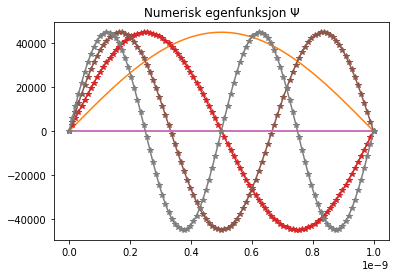

In [68]:
#Plotting av numeriske egenvektorer og egenverdier mot analytisk løsning av TUSL

x = np.linspace(0,L,N) #x-verdier i intervallet potensialbrønnens lengde

#Plotter egenvektorene
plt.figure()
plt.title("Numerisk egenfunksjon Ψ")

#Egenvektorene er kolonnene i psi-matrisen (= egenfunksjonene)
plt.plot(x, num_egenfunksjon[:,0])
plt.plot(x, anal_egenfunksjon[0] , label = "analytisk grunntilstand")
plt.plot(x, -num_egenfunksjon[:,1]) #OBS: må snu numerisk egenfunksjon pga. den har negative verdier!!!
plt.plot(x, anal_egenfunksjon[1], marker = '*', label = "analytisk 1.eksiterte tilstand")
plt.plot(x, num_egenfunksjon[:,2])
plt.plot(x, anal_egenfunksjon[2], marker = '*', label = "analytisk 2.eksiterte tilstand")
plt.plot(x, num_egenfunksjon[:,3])
plt.plot(x, anal_egenfunksjon[3], marker = '*', label = "analytisk 3.eksiterte tilstand")
#plt.axhline(0)
plt.show()

#skal man plotte egenverdier?


[[ 1.00000000e+00 -2.65114304e-16 -1.15049633e-14 ... -1.48296241e-17
  -8.75874138e-18 -6.75219262e-17]
 [-2.65114304e-16  1.00000000e+00 -3.14223471e-14 ...  8.58899354e-19
  -7.78409761e-18 -1.96585294e-17]
 [-1.15049633e-14 -3.14223471e-14  1.00000000e+00 ...  2.94764768e-17
   4.68328124e-17 -1.15650779e-17]
 ...
 [-1.48296241e-17  8.58899354e-19  2.94764768e-17 ...  1.00000000e+00
   1.83650424e-16  1.93922124e-16]
 [-8.75874138e-18 -7.78409761e-18  4.68328124e-17 ...  1.83650424e-16
   1.00000000e+00  6.20740264e-17]
 [-6.75219262e-17 -1.96585294e-17 -1.15650779e-17 ...  1.93922124e-16
   6.20740264e-17  1.00000000e+00]]


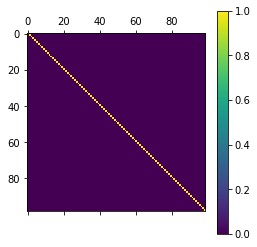

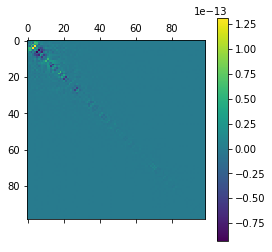

In [69]:
#sjekker om egenfunksjonene er ortonormerte
print (num_egenfunksjon.T @ num_egenfunksjon)

#dobbeltsjekker at vi har fått identitetsmatrisen
plt.matshow(num_egenfunksjon.T@num_egenfunksjon) 
plt.colorbar()
plt.show()

plt.matshow(np.identity(N) - num_egenfunksjon.T@num_egenfunksjon)  #støy
plt.colorbar()
plt.show()
#fullstendig sett når vi får identitetsmatrisen her

In [70]:
#regner ut avvik mellom numerisk og analytisk beregnet egenverdier

avvik_egenverdier= (anal_egenverdi - num_egenverdi)

avvik_egenvektorer = (anal_egenfunksjon.T - num_egenfunksjon)

#print("Avvik for analytisk og numerisk beregnede egenvektorer:\n ", avvik_egenvektorer)
#print("\n")
#print("Avvik for analytisk og numerisk beregnede egenverdier:\n ",avvik_egenverdier)


## Oppgave 2: Atomer


En endimensjonal modell for et atom er er en endelig potensialbrønn med dybde V_o og bredde omega. Vi ser på et område med bredde minst 10*omega på hver side av atomer der potensialet er 0 utenfor brønnen.
a)
Velger passende verdier for V_0 og omega slik at atomer har tre bundne tilstander.
Verifiser at bølgefunksjonene har fornuftige egenskapet mhp. symmetri og bølgelengder i det klassiske tillate område.
Sammenlign de beregnde egennivåene E med analytiske løsninger
Verifiser at beregningene gir et "kvasikontinuerlig" spektrum av ubundne tilstander med E>0, dvs. ....?
Sjekk en ubundet tilstand og vis at bølgelengdene er i samsvar med elektronets kinetiske energi i og utenfor brønnområdet.

b)


In [101]:
#Potensialbrønn med negativt potensial (dybde). Null der potensialbrønnen slutter (v/bakken)

#snur formelen i PCH 3.33 til å være avh av n antall bundne tilstander
#w/2 er halve bønnbredden

w = 3*aa 
L_2 = 21*w
N_2 = int((L_2/delta_x) - 1)

def finnV0(n):
    V_0 =  np.power( ((n-1)*h*np.pi),2) / (8*m*np.power(w/2,2) )
            
    return -V_0/eV

V0 = finnV0(3)
    
print("V0 er: ", V0)
print('brønnbredde = ', w)
print('lengden på området = ', L_2)
print( 'antall målepunkter N =', N_2)

V0 er:  -16.73589161445443
brønnbredde =  3e-10
lengden på området =  6.3e-09
antall målepunkter N = 629


In [99]:
#n er antall brønner
#N er antall målepunkter

#Lager potensialbrønnen
x2 = np.linspace(0,L_2,N_2)
print(len(x2))

#lager potensialvektoren
def Vvec(x):
    return np.where( (x > L_2/2 - w/2) and (x < L_2/2 + w/2), V0, 0 )

V_2 = Vvec(x2)
print(len(V_2))

#num_egenverdier_atom = numerisk_TUSL(V_2, N_2)[0]
#num_egenfunksjoner_atom = numerisk_TUSL(V_2, N_2)[1]

#print("Numeriske egenverdier i potensialbrønnen:\n ", num_egenverdier_atom)
#print("Numeriske egenfunksjoner i potensialbrønnen:\n ", num_egenfunksjoner_atom)

629


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

NameError: name 'Pot_vektor_a' is not defined

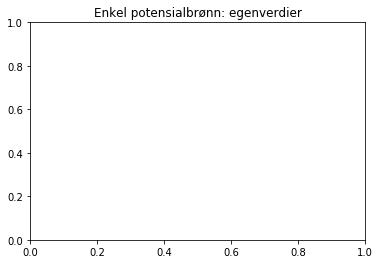

In [100]:


#numerisk egenverdier
plt.figure()
plt.title("Enkel potensialbrønn: egenverdier")

plt.plot(Pot_vektor_a/eV)
plt.axhline(num_egenverdier_atom[0], color='r')
plt.axhline(num_egenverdier_atom[1], color='g')
plt.axhline(num_egenverdier_atom[2], color='y')
for i in range(3,15):
    plt.axhline(num_egenverdier_atom[i])
plt.show()

#numerisk egenvektorer
plt.figure()
plt.title("Enkel potensialbrønn: egenfunksjoner")
plt.plot(x_2, num_egenfunksjoner_atom[:,0], label= "grunntilstand")
plt.plot(x_2, num_egenfunksjoner_atom[:,1], label= "1.eksiterte tilstand")
plt.plot(x_2, num_egenfunksjoner_atom[:,2], label= "2.eksiterte tilstand")
plt.show()(

print(num_egenverdier_atom[0], ' .', num_egenverdier_atom[1], ' . ',num_egenverdier_atom[2]))


Latex: skriv tan() formel og sjekk at det stemmer overens, da stemmer de numeriske verdiene med de analytiske


## Oppgave 3 Molekyler


Studere toatomig molekyl som bestsår av to potensialbrønner med samme dybde V_0 og bredde omega.
Potensialbrønnene er adskilt av et område med null potensial V og bredd b. Se på et omnråde med null potensial og bredde minst 10*omega på hver side av molekylet

Sett verdier for V_0, b og omega.
Hva gir en slik modell for bindingsenergien til molekylene H_2 og He_2  (bindingsenergien vil si energidifferansen mellom to separate atomer og det toatomige molekylet)
Er dette i samsvar (kvalitativt) med den virkelige verden?

In [76]:
#Lager to potensialbrønner

N_3 = 500+50+5+50+500 #to brønner bredde 50 og en bredde 5 mellom dem + 500 på hver side
L_3 = omega*22.1 
x_3 = np.linspace(0,L_3,N_3)

c = int(500)
d = int(550)
e = int(555)
f = int(605)

V_3 =np.zeros(N_3)
V_3[c:d] = V_0 #første brønn
V_3[e:f] = V_0 #andre brønn


num_egenverdier_mol = numerisk_TUSL(V_3,N_3,L_3)[0]
num_egenfunksjoner_mol = numerisk_TUSL(V_3, N_3, L_3)[1]


NameError: name 'omega' is not defined

NameError: name 'V_3' is not defined

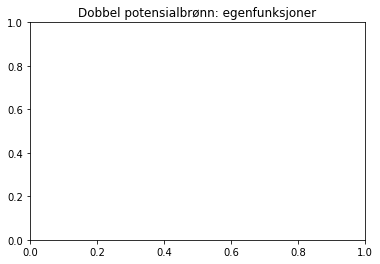

In [20]:
#plotter brønnen
plt.figure()
plt.title("Dobbel potensialbrønn: egenfunksjoner")

#numeriske egenverdier
plt.plot(V_3/eV)
plt.xlim(450,650)
plt.axhline(num_egenverdier_mol[0], color='r')
plt.axhline(num_egenverdier_mol[1], color='g')
plt.axhline(num_egenverdier_mol[2], color='b')
plt.axhline(num_egenverdier_mol[3], color='y')
plt.axhline(num_egenverdier_mol[4])
plt.axhline(num_egenverdier_mol[5])
plt.axhline(num_egenverdier_mol[6])
plt.show()

#numeriske egenfunksjoner
plt.figure()
#plt.xlim(0.2e-8,0.4e-8)
plt.title("Dobbel Potensialbrønn: egenfunksjoner")
plt.plot(x_3, num_egenfunksjoner_mol[:,0], label= "grunntilstand")
plt.plot(x_3, num_egenfunksjoner_mol[:,1], label= "1.eksiterte tilstand")
plt.plot(x_3, num_egenfunksjoner_mol[:,2], label= "2.eksiterte tilstand")
plt.show()

Bindingsenergi for H2 og He2:
Bindingsenergi er differansen mellom energien for summen av energien til atomene og for det toatomige molekylet

In [21]:
#bindingsenergi for H2
bindingsenergi_h2 = 2*num_egenverdier_atom[0] - 2*num_egenverdier_mol[0]

bindingsenergi_he2 = 4*num_egenverdier_atom[0] - 2*(num_egenverdier_mol[1]+ num_egenverdier_mol[0] )
                                                    
print("Bindingsenergien til H2-molekylet er: ", bindingsenergi_h2, " eV")
print("Bindingsenergien til He2-molekylet er: ", bindingsenergi_he2, " eV")


NameError: name 'num_egenverdier_atom' is not defined

## Oppgave 4b) : Krystaller

Finn båndbredden for ulike n-brønner og sammenligne.
Båndbredde: differansen mellom største og minste energinivå
båndbredden er differansen mellom En-E_0.
Skal plottes med x-aksen (antall brønner) og y-aksen(energinivå)



In [13]:
#Lager fem potensialbrønner

#Oda har gjort det
#funksjon som returnerer en vektor V_n for n antall brønner (n antall atomer)

def bronn(n):
    
    intervall = 500*2 + 50*n + 5*(n-1) 
    lengde = w*intervall

    Vn = np.zeros(intervall)
    
    for i in range(500, intervall-500, 55):
        Vn[i:i+50] = V_0 

    #løser egenverdier
    egenverdi = numerisk_TUSL(Vn,intervall,lengde)[0]

    #vet at båndbredden til en krystall med n antall brønner er lik E(n-1)- E0.
    
    bandbredde = egenverdi[n-1] - egenverdi[0]
    return bandbredde, egenverdi

  
båndbredde = []
for n in range(5,100,10):
    båndbredde.append( bronn(n)[0] )

x_b = np.linspace(5, 100, len(båndbredde))
print(båndbredde, '\n', x)


NameError: name 'omega' is not defined

NameError: name 'x_b' is not defined

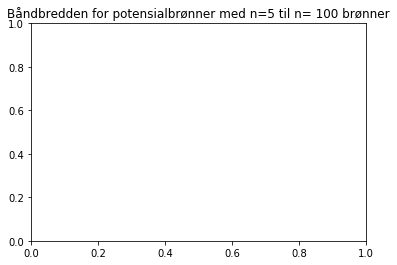

In [14]:
#plotter båndbredden
plt.figure()
plt.title("Båndbredden for potensialbrønner med n=5 til n= 100 brønner")
plt.plot(x_b, båndbredde)
plt.xlabel("antall brønner")
plt.ylabel("Energinivå (eV)")
plt.show()


## Oppgave 4c)

Antar plass til 4N elektroner i krystallet og 2n orbitaler i hvert skall (1 m. spinn opp og 2 m. spinn ned).

Velg et hvilket som helst tall for n (antall brønner)
Hva blir energien til de to elektronene med høyest energi?
Hvor stor er energiavstanden derfra og opp til nærmeste ledige tilstand  (= båndgap) ? 
Finn ut om krystallen er en isolator eller en halvleder.

Manuell utregning:

Velger en krystall med 6 antall brønner. Da har vi totalt plass til 24elektroner i krystallet.
Da fylles 12 orbitaler med elektroner, dvs. E_11 er høyest elektronenergi i krystallet.
Båndgapet (= energiavstand derfra og opp til nærmeste ledige tilstand E_12) = 0.7 eV. 
Det vil si at et krystall på 6 atomer (brønner) er en halvleder. 


## Oppgave 4d)

Antar a er en gitterkonstant (avstanden fra midten av to nabobrønner)
Plott to sett med ulik antall brønner, plott bølgefunksjonen og sjekk for symmetri 



In [ ]:
Ved å se på plottene over de numerisk bundne egenfunksjonene, ser man at grunntilstanden er symmetrisk uten nullpunkter, 1. eksiterte tilstand er antisymmetrisk med 1 nullpunkt osv., slik som forventet. 
Vi ser at vi har tre bundne tilstander, slik vi ønsket. 
Vi vet at ved bunde tilstander inne i brønnen vil $E_j < 0$, j = 1,2,3, altså vil funksjonen krumme mot x-aksen slik man ser egenfunksjonene for de tre første tilstandene gjør. 
I det klassisk forbudte området, som er ved veggene til brønnen, skal egenfunksjonen krumme bort fra x-aksen. 
Det ser vi at er tilfelle for egenfunksjonen i de tre første tilstandene. 
Et annet element vi kan merke oss er at bølgelengden til egenfunksjonene minker ved økende energinivå. Dette stemmer med teorien om at økende energi impliserer kortere bølgelengde. Disse observasjoenen er med på å bekrefte at de numeriske egenfunksjonene har fornuftige egenskaper i forhold til det som er forventet. 

For å bestemme antall bundne tilstander i en endelig potensialbrønn har vi tatt i bruk PCH 3.33.

FORMEL 3.33


For en brønn med dybde V_{0} og dybde

For å sammenligne de numeriske energinivåene med de analytiske for bundne har vi brukt formelen PCH 3.29

\begin{equation}
\tan{\sqrt {2m l^2 \hbar^{-2} E}} = \left\{
\begin{array}{cc}
    \begin{array}{cc}
      \sqrt{\frac{\mid V_{0}\mid -E}{E}} & symmetriske \: \psi \\
      -\sqrt{\frac{E}{V_0 - E}} & antisymmetriske \: \psi \\
    \end{array}
\end{array}
\right.
\end{equation}

og satt inn egenverdiene $E_j$, j = 1,2,3. Vi får det samme på høyre side som på venstre side av ligningen, altså kan vi konkludere med at de numeriske energinivåene stemmer overrens med de analytiske verdiene for $E$. 

I plottet av potensialbrønnen med energinivåene har vi plottet energinivåer fra 4 til 15. Vi ser at vi har et kvasikontinuerlig spekter ettersom at energinivåene der $E > 0$ er tilnærmet kontinuerlig. 

Vi har sett nærmere på engenverdi og egenfunksjon i 3.eksiterte tilstand, en ubundnen tilstand, og beregnet bølgelengden utenfor og i brønnen. 
    På øyemål ser det ut som at dette stemmer med bølgelengdene til den 3.eksiterte, ubundne tilstanden i og utenfor brønnen.